<a href="https://colab.research.google.com/github/Francsco99/DSSAFinance/blob/main/Confronto_tra_ottimizzazioni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import useful libraries

In [ ]:
#Import the python libraries

#pandas is used to retrieve data from yahoo finance
from pandas_datareader import data as web
import pandas as pd

#yahoo finance
!pip install yfinance
import yfinance as yfin
yfin.pdr_override()

import numpy as np
import random

from google.colab import drive

#matplotlib to plot the data
import matplotlib.pyplot as plt
plt.style.use('classic')

import seaborn as sns

#scipy.optimize to run optimization
from scipy.optimize import minimize


!pip install PyPortfolioOpt
#Import libraries
from pypfopt.efficient_frontier import efficient_frontier
from pypfopt import risk_models
from pypfopt import expected_returns

from pypfopt.efficient_frontier.efficient_semivariance import EfficientFrontier


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 2.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 KB 2.3 MB/s eta 0:00:00


#Getting data for the portfolios

In [ ]:
#Mount google drive location
drive.mount('/content/drive')

#Load csv file
df_tickers = pd.read_csv('/content/drive/My Drive/sp500.csv')

#Show the first rows of the data frame
print(df_tickers.head())

#Extract the first column 'Symbol' names
data = df_tickers['Symbol'].values

Mounted at /content/drive
  Symbol                 Name       Last    Change    %Chg       High  \
0    MMM           3M Company  115.25.00       1.7  +1.50%  127.55.00   
1    ABT  Abbott Laboratories  110.35.00  -1.12.00  -1.01%  111.26.00   
2   ABBV           Abbvie Inc  146.28.00  -1.12.00  -0.76%  260.19.00   
3    ACN        Accenture Plc  277.27.00      3.01  +1.10%  279.42.00   
4   ATVI  Activision Blizzard   77.01.00      1.01  +1.34%   77.16.00   

         Low   Volume        Time  
0  113.46.00  4114400  2023-01-27  
1  110.21.00  4860800  2023-01-27  
2  146.15.00  4591400  2023-01-27  
3  273.34.00  2101100  2023-01-27  
4   75.22.00  4382700  2023-01-27  


In [ ]:
#Number of portfolios
n=10

In [ ]:
# Array to contain the portfolios
initial_portfolios = []

#Create 10 portfolios with 100 random stocks each
for _ in range(n):
    # Create a list of 100 random tickers from the imported file
    lista_random = list(random.sample(list(data), 100))
    # Append the list
    initial_portfolios.append(lista_random)

In [ ]:
# Ordina ogni lista dell'array in ordine alfabetico
portfolios = []

for lista in initial_portfolios:
  sl = list(sorted(lista))
  portfolios.append(sl)

In [ ]:
#Portfolio starting and ending dates for historical data
stockStartDate = '2017-01-01'
stockEndDate = '2019-01-01'

In [ ]:
# Array to contain pandas acquired data
historicalDF = []

#Get data for each portfolio
for p in portfolios:
  #Get the Adjusted Close information for each stock in the portfolio
  data = web.get_data_yahoo(p, stockStartDate,stockEndDate)['Adj Close']
  #Append the portfolios
  historicalDF.append(data)

[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  100 of 100 completed


In [ ]:
#Portfolio t0 investment date
initialStartInvestimentDate = '2019-01-01'
initialEndInvestimentDate = '2019-01-03'

In [ ]:
startDF = []
for p in portfolios:
  startData = web.get_data_yahoo(p, initialStartInvestimentDate,initialEndInvestimentDate)['Adj Close']
  startDF.append(startData)

[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  100 of 100 completed


In [ ]:
#Portfolio final investment date
finalStartInvestmentDate = '2022-01-01'
finalEndInvestmentDate = '2022-01-04'

In [ ]:
finalDF = []
for p in portfolios:
  finalData = web.get_data_yahoo(p, finalStartInvestmentDate,finalEndInvestmentDate)['Adj Close']
  finalDF.append(finalData)

[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  100 of 100 completed


#Initial setting of the portfolios, random weights assigned for each stock.

In [ ]:
#Calculate random initial weights for each portfolio 

#Initialize empty array to contain the ordered dict for each portfolio
initial_weights = []

# Itera su ogni portfolio
for portfolio in portfolios:
    # Genera pesi casuali per ogni stock
    weights = [random.uniform(0, 1) for _ in range(len(portfolio))]
    # Normalizza i pesi
    total_weight = sum(weights)
    weights = [weight/total_weight for weight in weights]
    # Crea un dizionario dei pesi per questo portfolio
    portfolio_dict = dict(zip(portfolio, weights))
    # Aggiungi il dizionario alla lista di dizionari dei pesi
    initial_weights.append(portfolio_dict)

In [ ]:
# Capitale iniziale
capital = 10000

# Array vuoto per i dizionari delle quantità
portfolio_quantities = []

# Loop sui portfoli per creare i dizionari delle quantità
for i, portfolio in enumerate(portfolios):
    # Accedi ai pesi normalizzati per questo portfolio
    weights_dict = initial_weights[i]
    # Calcola le quantità di denaro da allocare per ogni stock
    amounts = [weights_dict[stock] * capital for stock in portfolio]
    # Crea un dizionario delle quantità per questo portfolio
    portfolio_dict = dict(zip(portfolio, amounts))
    # Aggiungi il dizionario alla lista di dizionari delle quantità
    portfolio_quantities.append(portfolio_dict)

In [ ]:
#Array di dizionari con azione e prezzo di chiusura per ogni portfolio
close_prices_t0 = []

#Prendi ogni portfolio nel dataframe e convertilo in dizionario
for portfolio in startDF:
  prices = portfolio.to_dict()

  #Crea nuovo dizionario per ripulire i timestamp
  prices_new = {}
  for key in prices.keys():
    nv= list(prices[key].values())[0]
    prices_new[key] = nv
  close_prices_t0.append(prices_new)

In [ ]:
# Array vuoto per i nuovi dizionari contenenti le azioni e il numero di azioni acquistabili
portfolio_stocks = []

# Loop sui portfoli per creare i nuovi dizionari
for i, portfolio_dict in enumerate(portfolio_quantities):
    # Crea un nuovo dizionario per questo portfolio
    new_dict = {}
    for stock, investment in portfolio_dict.items():
        # Accedi al prezzo di chiusura per questa azione
        closing_price = close_prices_t0[i][stock]
        # Calcola la quantità di azioni acquistabile in base all'investimento e il prezzo di chiusura
        quantity = (investment / closing_price)
        # Aggiungi l'azione e il numero di azioni acquistabili al dizionario
        new_dict[stock] = quantity
    # Aggiungi il nuovo dizionario alla lista di nuovi dizionari
    portfolio_stocks.append(new_dict)

# Calculate useful parameters

In [ ]:
#Calculate simple return for each portfolio

#Initialize empty array
returns = []

for data in historicalDF:
  #Calculate the daily simple return = stock_price/stock_price_precedent -1
  r = data.pct_change()
  #Append the result
  returns.append(r)

In [ ]:
#Calculate the annual covariance matrix for each portfolio

#Initalize empty array
cov_matrix_annual = []

for r in returns:
  #Create and show the annualized covariance matrix
  cov_matrix = r.cov() * 252 #252 trading days in a year
  #Append the result
  cov_matrix_annual.append(cov_matrix)

In [ ]:
#Calculate variance for each portfolio

#Initialize empty array
variances = []

for i in range(n):
  current_weights = np.array(list(initial_weights[i].values()))
  current_cov_matrix = cov_matrix_annual[i]
  port_variance = np.dot(current_weights.T, np.dot(current_cov_matrix,current_weights))
  #Append the result
  variances.append(port_variance)

In [ ]:
#Calculate each portfolio volatility (std deviation)
volatilities = []
for v in variances:
  port_volatility = np.sqrt(v)
  #Append the result
  volatilities.append(port_volatility)

In [ ]:
#Calculate the annual portfolio return for each portfolio

#Initialize empty array
simpleAnnualReturns = []

for i in range(len(returns)):
  current_return = returns[i]
  current_weights = np.array(list(initial_weights[i].values()))
  portfolioSimpleAnnualReturn = np.sum(current_return.mean()*current_weights)*252
  #Append the result
  simpleAnnualReturns.append(portfolioSimpleAnnualReturn)

In [ ]:
#Print the variance and volatility for each portfolio
for j in range(n):
  print(f"portfolio {j+1}")
  print("variance: {:.20f}".format(variances[j]).replace(".",","))
  print("volatility: {:.20f}".format(volatilities[j]).replace(".",","))
  print("annual return: {:.20f}".format(simpleAnnualReturns[j]).replace(".",","))
  print("\n")

portfolio 1
variance: 0,01524769387714916026
volatility: 0,12348155278076625163
annual return: 0,09477260602773131259


portfolio 2
variance: 0,01445187726679150568
volatility: 0,12021596094858413850
annual return: 0,07137712237790055925


portfolio 3
variance: 0,01909437018213036921
volatility: 0,13818238014352760001
annual return: 0,03386905439155191155


portfolio 4
variance: 0,01753302739506898064
volatility: 0,13241233853032344236
annual return: 0,10454160037675773454


portfolio 5
variance: 0,01543381769541307680
volatility: 0,12423291711705507223
annual return: 0,08629411046181233169


portfolio 6
variance: 0,01869938533987864152
volatility: 0,13674569587332041642
annual return: 0,07750987380685590844


portfolio 7
variance: 0,01344544129686584683
volatility: 0,11595447941699296712
annual return: 0,11470327630076580794


portfolio 8
variance: 0,01540899320125137771
volatility: 0,12413296581187198420
annual return: 0,10336962479136366233


portfolio 9
variance: 0,0181539807792237

#Calculate performances before optimization

In [ ]:
#Calculate the expected annual return, volatility (risk), and variance for each portfolio
percent_variances = []
percent_volatilities = []
percent_returns = []

for i in range(n):
  current_variance = variances[i]
  current_vol = volatilities[i]
  current_ret = simpleAnnualReturns[i]

  percent_var = (current_variance)*100
  percent_vols = (current_vol)*100
  percent_ret = (current_ret)*100

  #Append the results
  percent_variances.append(percent_var)
  percent_volatilities.append(percent_vols)
  percent_returns.append(percent_ret)

#vediamo come va il portfolio senza ottimizzazione, al tempo finale gennaio 2022
spoiler, va bene

In [ ]:
#Array di dizionari con azione e prezzo di chiusura per ogni portfolio
close_prices_tf = []

#Prendi ogni portfolio nel dataframe e convertilo in dizionario
for portfolio in finalDF:
  prices = portfolio.to_dict()

  #Crea nuovo dizionario per ripulire i timestamp
  prices_new = {}
  for key in prices.keys():
    nv= list(prices[key].values())[0]
    prices_new[key] = nv
  close_prices_tf.append(prices_new)

In [ ]:
# Array vuoto per i nuovi dizionari contenenti le azioni e il numero di azioni acquistabili
portfolio_quantities_tf = []

# Loop sui portfoli per creare i nuovi dizionari
for i, portfolio_dict in enumerate(portfolio_stocks):
    # Crea un nuovo dizionario per questo portfolio
    new_dict = {}
    for stock, investment in portfolio_dict.items():
        # Accedi al prezzo di chiusura per questa azione
        closing_price = close_prices_tf[i][stock]
        # Calcola la quantità di azioni acquistabile in base all'investimento e il prezzo di chiusura
        quantity = (investment * closing_price)
        # Aggiungi l'azione e il numero di azioni acquistabili al dizionario
        new_dict[stock] = quantity
    # Aggiungi il nuovo dizionario alla lista di nuovi dizionari
    portfolio_quantities_tf.append(new_dict)

In [ ]:
for i in range(n):
  print(portfolios[i])
  #print(initial_weights[i])
  print("quantita iniziali")
  print(portfolio_quantities[i])
  print("quantita finali")
  print(portfolio_quantities_tf[i])
  print("prezzi iniziali")
  print(close_prices_t0[i])
  print("quantita finali")
  print(close_prices_tf[i])
  #print(portfolio_stocks[i])
  print("\n")

['AAPL', 'ABBV', 'ABT', 'ADM', 'ADP', 'ALL', 'AMCR', 'AMD', 'AON', 'AOS', 'APH', 'APTV', 'ATO', 'AXP', 'BAC', 'BKR', 'BMY', 'C', 'CBRE', 'CHRW', 'CINF', 'CL', 'CMCSA', 'CMI', 'COO', 'CSGP', 'CSX', 'CVX', 'DE', 'DHI', 'DLR', 'DPZ', 'DRI', 'DUK', 'DVA', 'EXR', 'FDX', 'FIS', 'FISV', 'FMC', 'FRT', 'GL', 'GOOG', 'GPN', 'GWW', 'HD', 'HIG', 'HII', 'HPE', 'IEX', 'IPG', 'ISRG', 'ITW', 'JBHT', 'KIM', 'KLAC', 'KO', 'L', 'LNC', 'LYB', 'MA', 'MCO', 'META', 'MKTX', 'MMM', 'MSFT', 'MTD', 'MU', 'NTRS', 'ODFL', 'PAYX', 'PFG', 'PGR', 'PH', 'PNC', 'PRU', 'PXD', 'RL', 'ROL', 'RSG', 'SCHW', 'SNPS', 'STX', 'SYY', 'TAP', 'TGT', 'TRV', 'TT', 'TXN', 'TXT', 'UNH', 'URI', 'VFC', 'VRSK', 'VRTX', 'WEC', 'WELL', 'WM', 'ZBH', 'ZION']
quantita iniziali
{'AAPL': 45.070135337991445, 'ABBV': 67.27592305533008, 'ABT': 79.32785326593276, 'ADM': 96.93216482929809, 'ADP': 36.96074472783317, 'ALL': 126.14148741191681, 'AMCR': 166.42203170352442, 'AMD': 127.67774284704439, 'AON': 35.34739134602893, 'AOS': 146.96459881657023, 

#Portfolio optimization using PyPortfolioOpt library

In [ ]:
#Initialize empty arrays
frontiers_sharpe = []
cleaned_weights_sharpe = []

#Calculate the expected returns and the annualised sample covariance matrix of asset returns
for data in historicalDF:
  mu = expected_returns.mean_historical_return(data)
  S = risk_models.sample_cov(data)

  #Optimize for maximal Sharpe Ratio
  ef = EfficientFrontier(mu,S)
  weights = ef.max_sharpe()
  cw = ef.clean_weights()
  frontiers_sharpe.append(ef)
  cleaned_weights_sharpe.append(cw)


/usr/local/lib/python3.8/dist-packages/pypfopt/risk_models.py:68: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pypfopt/risk_models.py:87: UserWarning: Could not fix matrix. Please try a different risk model.
  warnings.warn(


In [ ]:
from pypfopt.efficient_frontier.efficient_semivariance import EfficientFrontier

#Initialize empty arrays
frontiers_vol = []
cleaned_weights_vol = []

#Calculate the expected returns and the annualised sample covariance matrix of asset returns
for data in historicalDF:
  mu = expected_returns.mean_historical_return(data)
  S = risk_models.sample_cov(data)

  #Optimize for maximal Sharpe Ratio
  ef = EfficientFrontier(mu,S)
  weights = ef.min_volatility()
  cw = ef.clean_weights()
  frontiers_vol.append(ef)
  cleaned_weights_vol.append(cw)

In [ ]:
for i in range(n):
  print(f"Portfolio {i+1}")
  print("Pesi ottimizzazione sharpe")
  print(cleaned_weights_sharpe[i])
  print("Pesi ottimizzazione volatilità")
  print(cleaned_weights_vol[i])

Portfolio 1
Pesi ottimizzazione sharpe
OrderedDict([('AAPL', 0.0), ('ABBV', 0.0), ('ABT', 0.29365), ('ADM', 0.0), ('ADP', 0.0), ('ALL', 0.0), ('AMCR', 0.0), ('AMD', 0.0), ('AON', 0.0), ('AOS', 0.0), ('APH', 0.0), ('APTV', 0.0), ('ATO', 0.02523), ('AXP', 0.0), ('BAC', 0.0), ('BKR', 0.0), ('BMY', 0.0), ('C', 0.0), ('CBRE', 0.0), ('CHRW', 0.0), ('CINF', 0.0), ('CL', 0.0), ('CMCSA', 0.0), ('CMI', 0.0), ('COO', 0.0), ('CSGP', 0.0981), ('CSX', 0.04106), ('CVX', 0.0), ('DE', 0.0), ('DHI', 0.0), ('DLR', 0.0), ('DPZ', 0.0121), ('DRI', 0.00481), ('DUK', 0.09458), ('DVA', 0.0), ('EXR', 0.0), ('FDX', 0.0), ('FIS', 0.0), ('FISV', 0.0), ('FMC', 0.0), ('FRT', 0.0), ('GL', 0.0), ('GOOG', 0.0), ('GPN', 0.0), ('GWW', 0.0), ('HD', 0.0), ('HIG', 0.0), ('HII', 0.0), ('HPE', 0.0), ('IEX', 0.0), ('IPG', 0.0), ('ISRG', 0.11079), ('ITW', 0.0), ('JBHT', 0.0), ('KIM', 0.0), ('KLAC', 0.0), ('KO', 0.0), ('L', 0.0), ('LNC', 0.0), ('LYB', 0.0), ('MA', 0.0), ('MCO', 0.0), ('META', 0.0), ('MKTX', 0.05584), ('MMM', 0.0

#performance dopo 1 ottimizzazione

In [ ]:
# Capitale iniziale
capital = 10000

# Array vuoto per i dizionari delle quantità
portfolio_quantities_opt1 = []

# Loop sui portfoli per creare i dizionari delle quantità
for i, portfolio in enumerate(portfolios):
    # Accedi ai pesi normalizzati per questo portfolio
    weights_dict = cleaned_weights_sharpe[i]
    # Calcola le quantità di denaro da allocare per ogni stock
    amounts = [weights_dict[stock] * capital for stock in portfolio]
    # Crea un dizionario delle quantità per questo portfolio
    portfolio_dict = dict(zip(portfolio, amounts))
    # Aggiungi il dizionario alla lista di dizionari delle quantità
    portfolio_quantities_opt1.append(portfolio_dict)

In [ ]:
# Array vuoto per i nuovi dizionari contenenti le azioni e il numero di azioni acquistabili
portfolio_stocks_opt1 = []

# Loop sui portfoli per creare i nuovi dizionari
for i, portfolio_dict in enumerate(portfolio_quantities_opt1):
    # Crea un nuovo dizionario per questo portfolio
    new_dict = {}
    for stock, investment in portfolio_dict.items():
        # Accedi al prezzo di chiusura per questa azione
        closing_price = close_prices_t0[i][stock]
        # Calcola la quantità di azioni acquistabile in base all'investimento e il prezzo di chiusura
        quantity = (investment / closing_price)
        # Aggiungi l'azione e il numero di azioni acquistabili al dizionario
        new_dict[stock] = quantity
    # Aggiungi il nuovo dizionario alla lista di nuovi dizionari
    portfolio_stocks_opt1.append(new_dict)

In [ ]:
# Array vuoto per i nuovi dizionari contenenti le azioni e il numero di azioni acquistabili
portfolio_quantities_tf_opt1 = []

# Loop sui portfoli per creare i nuovi portfolio_stocks_opt1
for i, portfolio_dict in enumerate(portfolio_stocks_opt1):
    # Crea un nuovo dizionario per questo portfolio
    new_dict = {}
    for stock, investment in portfolio_dict.items():
        # Accedi al prezzo di chiusura per questa azione
        closing_price = close_prices_tf[i][stock]
        # Calcola la quantità di azioni acquistabile in base all'investimento e il prezzo di chiusura
        quantity = (investment * closing_price)
        # Aggiungi l'azione e il numero di azioni acquistabili al dizionario
        new_dict[stock] = quantity
    # Aggiungi il nuovo dizionario alla lista di nuovi dizionari
    portfolio_quantities_tf_opt1.append(new_dict)

In [ ]:
for i in range(n):
  print(portfolios[i])
  #print(initial_weights[i])
  print("quantita iniziali")
  print(portfolio_quantities_opt1[i])
  print("quantita finali")
  print(portfolio_quantities_tf_opt1[i])
  print("prezzi iniziali")
  print(close_prices_t0[i])
  print("prezzi finali")
  print(close_prices_tf[i])
  #print(portfolio_stocks[i])
  print("\n")

['AAPL', 'ABBV', 'ABT', 'ADM', 'ADP', 'ALL', 'AMCR', 'AMD', 'AON', 'AOS', 'APH', 'APTV', 'ATO', 'AXP', 'BAC', 'BKR', 'BMY', 'C', 'CBRE', 'CHRW', 'CINF', 'CL', 'CMCSA', 'CMI', 'COO', 'CSGP', 'CSX', 'CVX', 'DE', 'DHI', 'DLR', 'DPZ', 'DRI', 'DUK', 'DVA', 'EXR', 'FDX', 'FIS', 'FISV', 'FMC', 'FRT', 'GL', 'GOOG', 'GPN', 'GWW', 'HD', 'HIG', 'HII', 'HPE', 'IEX', 'IPG', 'ISRG', 'ITW', 'JBHT', 'KIM', 'KLAC', 'KO', 'L', 'LNC', 'LYB', 'MA', 'MCO', 'META', 'MKTX', 'MMM', 'MSFT', 'MTD', 'MU', 'NTRS', 'ODFL', 'PAYX', 'PFG', 'PGR', 'PH', 'PNC', 'PRU', 'PXD', 'RL', 'ROL', 'RSG', 'SCHW', 'SNPS', 'STX', 'SYY', 'TAP', 'TGT', 'TRV', 'TT', 'TXN', 'TXT', 'UNH', 'URI', 'VFC', 'VRSK', 'VRTX', 'WEC', 'WELL', 'WM', 'ZBH', 'ZION']
quantita iniziali
{'AAPL': 0.0, 'ABBV': 0.0, 'ABT': 2936.5, 'ADM': 0.0, 'ADP': 0.0, 'ALL': 0.0, 'AMCR': 0.0, 'AMD': 0.0, 'AON': 0.0, 'AOS': 0.0, 'APH': 0.0, 'APTV': 0.0, 'ATO': 252.29999999999998, 'AXP': 0.0, 'BAC': 0.0, 'BKR': 0.0, 'BMY': 0.0, 'C': 0.0, 'CBRE': 0.0, 'CHRW': 0.0, 'CINF'

#portfolio dopo 2 ottimizzazione

In [ ]:
# Capitale iniziale
capital = 10000

# Array vuoto per i dizionari delle quantità
portfolio_quantities_opt2 = []

# Loop sui portfoli per creare i dizionari delle quantità
for i, portfolio in enumerate(portfolios):
    # Accedi ai pesi normalizzati per questo portfolio
    weights_dict = cleaned_weights_vol[i]
    # Calcola le quantità di denaro da allocare per ogni stock
    amounts = [weights_dict[stock] * capital for stock in portfolio]
    # Crea un dizionario delle quantità per questo portfolio
    portfolio_dict = dict(zip(portfolio, amounts))
    # Aggiungi il dizionario alla lista di dizionari delle quantità
    portfolio_quantities_opt2.append(portfolio_dict)

In [ ]:
# Array vuoto per i nuovi dizionari contenenti le azioni e il numero di azioni acquistabili
portfolio_stocks_opt2 = []

# Loop sui portfoli per creare i nuovi dizionari
for i, portfolio_dict in enumerate(portfolio_quantities_opt2):
    # Crea un nuovo dizionario per questo portfolio
    new_dict = {}
    for stock, investment in portfolio_dict.items():
        # Accedi al prezzo di chiusura per questa azione
        closing_price = close_prices_t0[i][stock]
        # Calcola la quantità di azioni acquistabile in base all'investimento e il prezzo di chiusura
        quantity = (investment / closing_price)
        # Aggiungi l'azione e il numero di azioni acquistabili al dizionario
        new_dict[stock] = quantity
    # Aggiungi il nuovo dizionario alla lista di nuovi dizionari
    portfolio_stocks_opt2.append(new_dict)

In [ ]:
# Array vuoto per i nuovi dizionari contenenti le azioni e il numero di azioni acquistabili
portfolio_quantities_tf_opt2 = []

# Loop sui portfoli per creare i nuovi portfolio_stocks_opt1
for i, portfolio_dict in enumerate(portfolio_stocks_opt2):
    # Crea un nuovo dizionario per questo portfolio
    new_dict = {}
    for stock, investment in portfolio_dict.items():
        # Accedi al prezzo di chiusura per questa azione
        closing_price = close_prices_tf[i][stock]
        # Calcola la quantità di azioni acquistabile in base all'investimento e il prezzo di chiusura
        quantity = (investment * closing_price)
        # Aggiungi l'azione e il numero di azioni acquistabili al dizionario
        new_dict[stock] = quantity
    # Aggiungi il nuovo dizionario alla lista di nuovi dizionari
    portfolio_quantities_tf_opt2.append(new_dict)

#Portfolio optimization using custom defined function and minimize libary

In [ ]:
#Define the lambda parameter
lambd = 0.6

#Define the objective function
def objective_function(x, lambd, Q, a):
    return -np.dot(a,x) + lambd*np.dot(x,np.dot(Q,x))

#Define the optimization constraints
cons = {'type':'eq', 'fun':lambda x: np.sum(x)-1}

minimized_weights = []

for i in range(n):
  current_p = portfolios[i]
  current_cm = cov_matrix_annual[i]
  current_w = np.array(list(initial_weights[i].values()))
  current_r = returns[i]
  #Run the optimization
  current_min = minimize(objective_function, current_w, args=(lambd,current_cm,np.mean(current_r, axis=0)), constraints=cons, bounds=[(0,1) for j in range(len(current_p))])
  minimized_weights.append(current_min)

In [ ]:
#Create array of dictionaries to contain the stocks of each portfolio and the minimized weights
optimized_weights =[]

for stocks, peso_portfolio in zip(portfolios, minimized_weights):
    peso_dict = {}
    for stock, peso in zip(stocks, peso_portfolio.x):
        peso_dict[stock] = peso
    optimized_weights.append(peso_dict)

In [ ]:
# Capitale iniziale
capital = 10000

# Array vuoto per i dizionari delle quantità
portfolio_quantities_opt3 = []

# Loop sui portfoli per creare i dizionari delle quantità
for i, portfolio in enumerate(portfolios):
    # Accedi ai pesi normalizzati per questo portfolio
    weights_dict = optimized_weights[i]
    # Calcola le quantità di denaro da allocare per ogni stock
    amounts = [weights_dict[stock] * capital for stock in portfolio]
    # Crea un dizionario delle quantità per questo portfolio
    portfolio_dict = dict(zip(portfolio, amounts))
    # Aggiungi il dizionario alla lista di dizionari delle quantità
    portfolio_quantities_opt3.append(portfolio_dict)

In [ ]:
# Array vuoto per i nuovi dizionari contenenti le azioni e il numero di azioni acquistabili
portfolio_stocks_opt3 = []

# Loop sui portfoli per creare i nuovi dizionari
for i, portfolio_dict in enumerate(portfolio_quantities_opt3):
    # Crea un nuovo dizionario per questo portfolio
    new_dict = {}
    for stock, investment in portfolio_dict.items():
        # Accedi al prezzo di chiusura per questa azione
        closing_price = close_prices_t0[i][stock]
        # Calcola la quantità di azioni acquistabile in base all'investimento e il prezzo di chiusura
        quantity = (investment / closing_price)
        # Aggiungi l'azione e il numero di azioni acquistabili al dizionario
        new_dict[stock] = quantity
    # Aggiungi il nuovo dizionario alla lista di nuovi dizionari
    portfolio_stocks_opt3.append(new_dict)

In [ ]:
# Array vuoto per i nuovi dizionari contenenti le azioni e il numero di azioni acquistabili
portfolio_quantities_tf_opt3 = []

# Loop sui portfoli per creare i nuovi portfolio_stocks_opt1
for i, portfolio_dict in enumerate(portfolio_stocks_opt3):
    # Crea un nuovo dizionario per questo portfolio
    new_dict = {}
    for stock, investment in portfolio_dict.items():
        # Accedi al prezzo di chiusura per questa azione
        closing_price = close_prices_tf[i][stock]
        # Calcola la quantità di azioni acquistabile in base all'investimento e il prezzo di chiusura
        quantity = (investment * closing_price)
        # Aggiungi l'azione e il numero di azioni acquistabili al dizionario
        new_dict[stock] = quantity
    # Aggiungi il nuovo dizionario alla lista di nuovi dizionari
    portfolio_quantities_tf_opt3.append(new_dict)

In [ ]:
#PERFOMANCES AFTER OPTIMIZATION 3: CUSTOM FUNCTION
opt_returns = []
opt_annual_return = []
opt_risk = []
opt_percentages = []

for i in range(n):
  current_min_w = minimized_weights[i]
  current_r = returns[i]
  current_cm = cov_matrix_annual[i]

  #Calculate the expected return
  expected_return = np.dot(current_min_w.x,np.mean(current_r, axis=0))*100
  opt_returns.append(expected_return)

  #Calculate the annual return
  annual_return = expected_return*252
  opt_annual_return.append(annual_return)
  
  #Calculate the expected risk
  expected_risk = np.sqrt(np.dot(current_min_w.x,np.dot(current_cm,current_min_w.x)))*100
  opt_risk.append(expected_risk)

  #calculate percentage for each stock
  percentages = current_min_w.x/np.sum(current_min_w.x)
  opt_percentages.append(percentages)

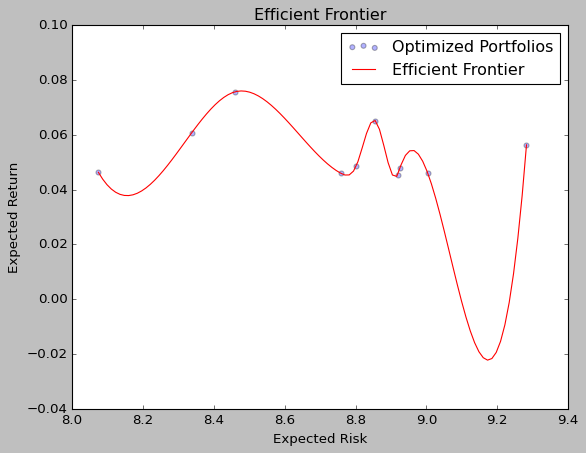

In [ ]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Plot the optimized portfolios
plt.scatter(opt_risk, opt_returns, alpha=0.3, label='Optimized Portfolios')

# Interpolate the efficient frontier
f = interp1d(opt_risk, opt_returns, kind='cubic')
x = np.linspace(min(opt_risk), max(opt_risk), num=100)
y = f(x)

# Plot the efficient frontier
plt.plot(x, y, 'r-', label='Efficient Frontier')

plt.xlabel('Expected Risk')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
plt.legend()
plt.show()


#Risultati dei portfoli in termini di investimento monetario, capitale iniziale di 10.000 euro

In [ ]:
#NO OPTIMIZATION
print("PERFOMANCES WITHOUT ANY OPTIMIZATION\n")
# Creazione di una lista di dizionari con i dati di investimento e ritorno per ogni portfolio
portfolio_data = []
for i in range(n):
    data = {"Portfolio": i+1,
            "Investimento iniziale": sum(portfolio_quantities[i].values()),
            "Ritorno finale": sum(portfolio_quantities_tf[i].values())}
    portfolio_data.append(data)

# Creazione di un dataframe pandas con la lista di dizionari
df = pd.DataFrame(portfolio_data)

# Visualizzazione della tabella
print(df.to_string(index=False))

PERFOMANCES WITHOUT ANY OPTIMIZATION

 Portfolio  Investimento iniziale  Ritorno finale
         1                10000.0    19715.758220
         2                10000.0    19115.863850
         3                10000.0    23129.492418
         4                10000.0    22468.928138
         5                10000.0    21868.310177
         6                10000.0    22532.087208
         7                10000.0    19430.362408
         8                10000.0    24423.784323
         9                10000.0    22463.127701
        10                10000.0    21107.524374


In [ ]:
print(portfolio_quantities_tf[0].values())

dict_values([214.03618635792228, 119.30342936067758, 166.4101009441349, 176.13485147130916, 73.82228184799706, 195.51575943997307, 244.00241449845143, 1018.7097644405801, 73.90591086254936, 298.799092763783, 267.3054108662271, 257.4500103461477, 146.62339289464498, 109.54979378771948, 263.8887292611302, 229.88573078264307, 239.97962691611554, 0.08461580139542794, 323.78964874687, 128.25122146601706, 307.5216850811707, 187.35554479641334, 109.0271848826191, 23.22477790433629, 11.88736589716201, 13.670941699035764, 120.10484769538051, 189.85284152818724, 361.1902877028976, 188.33032806340438, 264.6758471378224, 372.7167071197726, 124.9524525613214, 110.59317096773698, 314.5776608260181, 317.96521581018317, 294.6851233143197, 209.2533606591606, 91.81131634146655, 120.02891706360637, 94.64044894790267, 221.05643977897597, 183.78177967468739, 143.8833970541941, 71.5352776536925, 172.96359849101293, 150.05773219466056, 67.79198995462328, 44.9357314561662, 56.846622044384446, 87.0837013310313

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

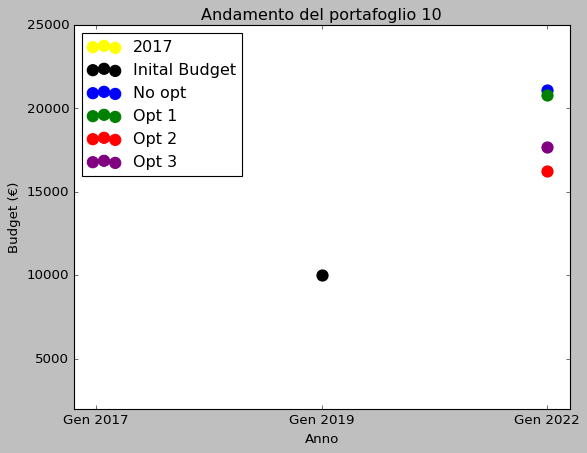

In [ ]:
import matplotlib.pyplot as plt
i=9
  # Definizione dei dati da visualizzare
anni = ['Gen 2017', 'Gen 2019', 'Gen 2022']
budget_2017 = 0
budget_2019 = 10000
budget_2022 = [sum(portfolio_quantities_tf[i].values()), sum(portfolio_quantities_tf_opt1[i].values()),
               sum(portfolio_quantities_tf_opt2[i].values()),sum(portfolio_quantities_tf_opt3[i].values())]
colors = ['blue', 'green', 'red', 'purple']
color_2019 = 'black'
color_2017 = 'yellow'

plt.title(f"Andamento del portafoglio {i+1}")
# Creazione del grafico
plt.scatter([anni[0]]*1, [budget_2017], marker='o', s=100, color=(color_2017))
plt.scatter([anni[1]]*1, [budget_2019], marker='o', s=100, color=color_2019)
for i in range(len(budget_2022)):
  plt.scatter([anni[2]]*1, [budget_2022[i]], marker='o', s=100, color=colors[i])
  plt.xticks(anni)
  plt.ylim(bottom=2000)
  plt.xlabel('Anno')
  plt.ylabel('Budget (€)')
  plt.legend(['2017','Inital Budget', 'No opt', 'Opt 1', 'Opt 2','Opt 3'], loc='upper left')
#Download plot
plt.savefig("fig2.pdf")
from google.colab import files
files.download("fig2.pdf")
plt.show()


In [ ]:
#PERFOMANCES AFTER OPTIMIZATION 1: MAXIMIZE SHARPE RATIO
print("PERFOMANCES AFTER OPTIMIZATION 1: MAXIMIZE SHARPE RATIO\n")
# Creazione di una lista di dizionari con i dati di investimento e ritorno per ogni portfolio
portfolio_data_opt1 = []
for i in range(n):
    data = {"Portfolio": i+1,
            "Investimento iniziale": sum(portfolio_quantities_opt1[i].values()),
            "Ritorno finale": sum(portfolio_quantities_tf_opt1[i].values())}
    portfolio_data_opt1.append(data)

# Creazione di un dataframe pandas con la lista di dizionari
df_opt1 = pd.DataFrame(portfolio_data_opt1)

# Visualizzazione della tabella
print(df_opt1.to_string(index=False))

PERFOMANCES AFTER OPTIMIZATION 1: MAXIMIZE SHARPE RATIO

 Portfolio  Investimento iniziale  Ritorno finale
         1                 9999.9    19482.850819
         2                 9999.9    19572.716582
         3                10000.0    24666.886273
         4                10000.1    20503.844487
         5                10000.0    22429.995606
         6                 9999.9    40688.712658
         7                10000.2    20220.880739
         8                 9999.8    28300.878047
         9                10000.0    18011.460046
        10                10000.0    20821.179143


In [ ]:
#PERFOMANCES AFTER OPTIMIZATION 2: MINIMIZE VOLATILITY
print("PERFOMANCES AFTER OPTIMIZATION 2: MINIMIZE VOLATILITY\n")
# Creazione di una lista di dizionari con i dati di investimento e ritorno per ogni portfolio
portfolio_data_opt2 = []
for i in range(n):
    data = {"Portfolio": i+1,
            "Investimento iniziale": sum(portfolio_quantities_opt2[i].values()),
            "Ritorno finale": sum(portfolio_quantities_tf_opt2[i].values())}
    portfolio_data_opt2.append(data)

# Creazione di un dataframe pandas con la lista di dizionari
df_opt2 = pd.DataFrame(portfolio_data_opt2)

# Visualizzazione della tabella
print(df_opt2.to_string(index=False))

PERFOMANCES AFTER OPTIMIZATION 2: MINIMIZE VOLATILITY

 Portfolio  Investimento iniziale  Ritorno finale
         1                10000.0    16950.860255
         2                 9999.9    17138.930332
         3                 9999.4    17041.093619
         4                 9999.3    18596.748016
         5                10000.1    16740.773028
         6                10000.1    16383.696866
         7                 9999.9    17269.945007
         8                 9999.9    16033.123123
         9                10000.0    17183.658161
        10                10000.0    16242.423968


In [ ]:
#PERFOMANCES AFTER OPTIMIZATION 3: CUSTOM FUNCTION
print("PERFOMANCES AFTER OPTIMIZATION 3: CUSTOM FUNCTION\n")
# Creazione di una lista di dizionari con i dati di investimento e ritorno per ogni portfolio
portfolio_data_opt3 = []
for i in range(n):
    data = {"Portfolio": i+1,
            "Investimento iniziale": sum(portfolio_quantities_opt3[i].values()),
            "Ritorno finale": sum(portfolio_quantities_tf_opt3[i].values())}
    portfolio_data_opt3.append(data)

# Creazione di un dataframe pandas con la lista di dizionari
df_opt3 = pd.DataFrame(portfolio_data_opt3)

# Visualizzazione della tabella
print(df_opt3.to_string(index=False))

PERFOMANCES AFTER OPTIMIZATION 3: CUSTOM FUNCTION

 Portfolio  Investimento iniziale  Ritorno finale
         1                10000.0    17391.055668
         2                10000.0    17111.477766
         3                10000.0    17585.136492
         4                10000.0    18746.068011
         5                10000.0    17145.214293
         6                10000.0    17932.867984
         7                10000.0    17326.563261
         8                10000.0    17822.325525
         9                10000.0    17200.343897
        10                10000.0    17680.140148


#risultati in termini di rendimento e volatilità 

In [ ]:

#RESULTS WITHOUT OPTIMIZATION
# Creazione di una lista di dizionari con i dati di perfomance per ogni portfolio
perf_data = []
for j in range(len(percent_variances)):
    data = {"Portfolio": f"{j+1}",
            "Exp. ann. return": f"{percent_returns[j]:.2f}%",
            "Ann. volatility (risk)": f"{percent_volatilities[j]:.2f}%",
            "Ann. variance": f"{percent_variances[j]:.2f}%"}
    perf_data.append(data)

# Creazione di un dataframe pandas con la lista di dizionari
df = pd.DataFrame(perf_data)

# Visualizzazione della tabella
print(df.to_string(index=False))

# Salvataggio del dataframe in un file CSV
df.to_csv('performance.csv', index=False)

Portfolio Exp. ann. return Ann. volatility (risk) Ann. variance
        1            9.48%                 12.35%         1.52%
        2            7.14%                 12.02%         1.45%
        3            3.39%                 13.82%         1.91%
        4           10.45%                 13.24%         1.75%
        5            8.63%                 12.42%         1.54%
        6            7.75%                 13.67%         1.87%
        7           11.47%                 11.60%         1.34%
        8           10.34%                 12.41%         1.54%
        9            8.68%                 13.47%         1.82%
       10            7.85%                 12.56%         1.58%


In [ ]:
#PERFOMANCES AFTER OPTIMIZATION 1: MAXIMIZE SHARPE RATIO
#Print the results
print("PERFOMANCES AFTER OPTIMIZATION 1: MAXIMIZE SHARPE RATIO\n")
for i in range(len(frontiers_sharpe)):
  print(f"Portfolio '{i}':")
  frontiers_sharpe[i].portfolio_performance(verbose=True)
  print("\n")

PERFOMANCES AFTER OPTIMIZATION 1: MAXIMIZE SHARPE RATIO

Portfolio '0':
Expected annual return: 33.3%
Annual volatility: 13.3%
Sharpe Ratio: 2.35


Portfolio '1':
Expected annual return: 28.5%
Annual volatility: 11.9%
Sharpe Ratio: 2.24


Portfolio '2':
Expected annual return: 33.1%
Annual volatility: 14.6%
Sharpe Ratio: 2.13


Portfolio '3':
Expected annual return: 46.1%
Annual volatility: 15.9%
Sharpe Ratio: 2.77


Portfolio '4':
Expected annual return: 33.3%
Annual volatility: 12.8%
Sharpe Ratio: 2.44


Portfolio '5':
Expected annual return: 43.4%
Annual volatility: 14.7%
Sharpe Ratio: 2.81


Portfolio '6':
Expected annual return: 36.1%
Annual volatility: 11.5%
Sharpe Ratio: 2.98


Portfolio '7':
Expected annual return: 45.8%
Annual volatility: 12.4%
Sharpe Ratio: 3.53


Portfolio '8':
Expected annual return: 38.7%
Annual volatility: 14.0%
Sharpe Ratio: 2.61


Portfolio '9':
Expected annual return: 32.5%
Annual volatility: 11.1%
Sharpe Ratio: 2.75




In [ ]:
#PERFOMANCES AFTER OPTIMIZATION 2: MINIMIZE VOLATILITY
#Print the results
print("PERFOMANCES AFTER OPTIMIZATION 2: MINIMIZE VOLATILITY\n")
for i in range(len(frontiers_vol)):
  print(f"Portfolio '{i}':")
  frontiers_vol[i].portfolio_performance(verbose=True)
  print("\n")

PERFOMANCES AFTER OPTIMIZATION 2: MINIMIZE VOLATILITY

Portfolio '0':
Expected annual return: 8.5%
Annual volatility: 8.0%
Sharpe Ratio: 0.82


Portfolio '1':
Expected annual return: 6.0%
Annual volatility: 8.7%
Sharpe Ratio: 0.46


Portfolio '2':
Expected annual return: 3.8%
Annual volatility: 9.1%
Sharpe Ratio: 0.20


Portfolio '3':
Expected annual return: 8.0%
Annual volatility: 8.9%
Sharpe Ratio: 0.68


Portfolio '4':
Expected annual return: 7.9%
Annual volatility: 8.7%
Sharpe Ratio: 0.68


Portfolio '5':
Expected annual return: 5.2%
Annual volatility: 8.9%
Sharpe Ratio: 0.36


Portfolio '6':
Expected annual return: 12.8%
Annual volatility: 8.8%
Sharpe Ratio: 1.23


Portfolio '7':
Expected annual return: 13.6%
Annual volatility: 8.5%
Sharpe Ratio: 1.36


Portfolio '8':
Expected annual return: 9.7%
Annual volatility: 9.4%
Sharpe Ratio: 0.82


Portfolio '9':
Expected annual return: 8.8%
Annual volatility: 8.2%
Sharpe Ratio: 0.83




In [ ]:
#PERFOMANCES AFTER OPTIMIZATION 3: CUSTOM FUNCTION
# Creazione di una lista di dizionari con i dati di perfomance per ogni portfolio
perf_data_opt3 = []
for j in range(n):
    data = {"Portfolio": f"{j+1}",
            "Exp. ann. return": f"{opt_annual_return[j]:.2f}%",
            "Ann. volatility (risk)": f"{opt_risk[j]:.2f}%"}
    perf_data_opt3.append(data)

# Creazione di un dataframe pandas con la lista di dizionari
df_opt3 = pd.DataFrame(perf_data_opt3)

# Visualizzazione della tabella
print("PERFOMANCES AFTER OPTIMIZATION 3: CUSTOM FUNCTION\n")
print(df_opt3.to_string(index=False))

PERFOMANCES AFTER OPTIMIZATION 3: CUSTOM FUNCTION

Portfolio Exp. ann. return Ann. volatility (risk)
        1           11.67%                  8.07%
        2           11.56%                  8.76%
        3           11.60%                  9.00%
        4           11.43%                  8.92%
        5           12.25%                  8.80%
        6           12.09%                  8.93%
        7           16.41%                  8.86%
        8           19.07%                  8.46%
        9           14.19%                  9.28%
       10           15.31%                  8.34%
